In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as scn



In [4]:
dataset= pd.read_csv('/content/sample_data/rooms.csv')

In [5]:
dataset.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [6]:
def uniqu(value):
  value.unique()
  return value.unique()

In [7]:
uniqu(dataset['city'])

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [8]:
uniqu(dataset['statezip']).shape

(77,)

In [9]:
uniqu(dataset['country'])

array(['USA'], dtype=object)

In [10]:
dataset.drop(columns='date',inplace=True)

In [11]:
dataset.drop(columns='waterfront',inplace=True)

In [12]:
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  street         4600 non-null   object 
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
 15  country        4600 non-null   object 
dtypes: float64(4), int64(8), object(4)
memory usage: 575.1+ KB


In [14]:
dataset.drop(columns='street',inplace=True)

In [15]:
dataset.drop(columns='country' ,inplace=True)

In [16]:
dataset.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
view,0
condition,0
sqft_above,0
sqft_basement,0


In [17]:
dataset.duplicated().sum()

np.int64(0)

In [18]:
dataset.shape

(4600, 14)

In [19]:
dataset.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [20]:
dataset.shape

(4600, 14)

In [21]:
dataset.dropna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [22]:
dataset.shape

(4600, 14)

In [23]:
dataset['city'].replace(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44], inplace=True)

/tmp/ipython-input-2969529073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['city'].replace(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
/tmp/ipython-input-2969529073.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['city'].replace(['Shoreline', 'Seattle', 'Kent',

In [24]:
def clean(value):
  value= value.split(' ')[1]
  return value

In [25]:
a ="an mkkj 23"
clean(a)

'mkkj'

In [26]:
dataset['statezip']= dataset['statezip'].apply(clean)

In [27]:
dataset['statezip']

,statezip
0,98133
1,98119
2,98042
3,98008
4,98052
...,...
4595,98133
4596,98007
4597,98059
4598,98178


In [28]:
dataset['statezip'] = dataset['statezip'].astype(int)


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  city           4600 non-null   int64  
 13  statezip       4600 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 503.3 KB


In [30]:
data_input = dataset.drop(columns='price')
data_output = dataset['price']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(data_input,data_output,test_size=0.2)

In [32]:
model =LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
prediction = model.predict(x_test)

In [35]:
r2_scores= r2_score(y_test,prediction)

In [36]:
print (r2_scores)

0.5204243262076739


In [37]:
dataset.head(50
             )

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,1,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,2,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,3,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,4,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,5,98052
5,490000.0,2.0,1.00,880,6380,1.0,0,3,880,0,1938,1994,2,98115
6,335000.0,2.0,2.00,1350,2560,1.0,0,3,1350,0,1976,0,5,98052
7,482000.0,4.0,2.50,2710,35868,2.0,0,3,2710,0,1989,0,6,98038
8,452500.0,3.0,2.50,2430,88426,1.0,0,4,1570,860,1985,0,7,98045
9,640000.0,4.0,2.00,1520,6200,1.5,0,3,1520,0,1945,2010,2,98115


In [38]:
input_data_model=pd.DataFrame([[
    3.0	,1.5	,1340	,7912	,1.5	,	0,	3,	1340,	0,	1955,	2005,	1,	98133

]],columns=["bedrooms",	"bathrooms"	,"sqft_living","sqft_lot","floors","view","condition","sqft_above","sqft_basement","yr_built","yr_renovated","city","statezip"])

In [39]:
input_data_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.0,1.5,1340,7912,1.5,0,3,1340,0,1955,2005,1,98133


In [40]:
model.predict(input_data_model)

array([379568.58032044])

In [41]:
import pickle as pk

In [42]:
pk.dump(model,open('house.pkl','wb'))

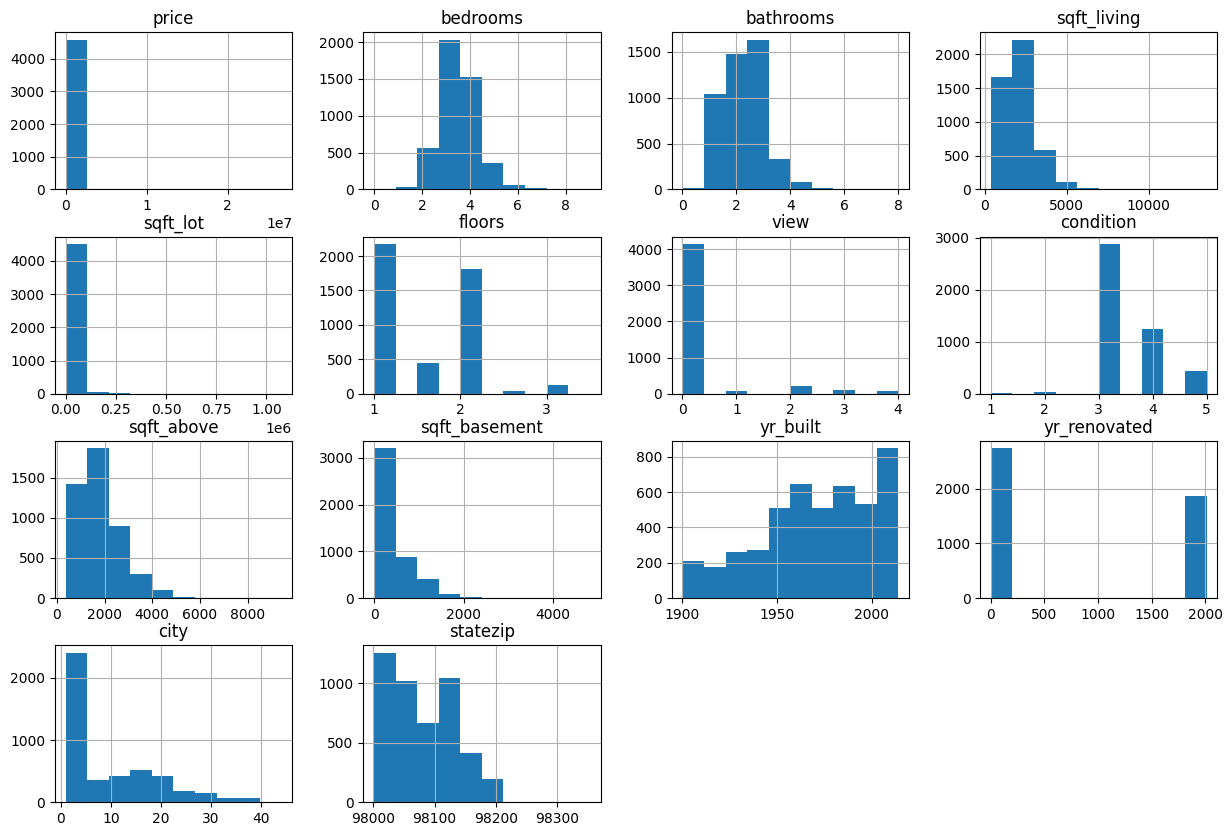

In [43]:
dataset.hist(figsize=(15,10))
plt.show()

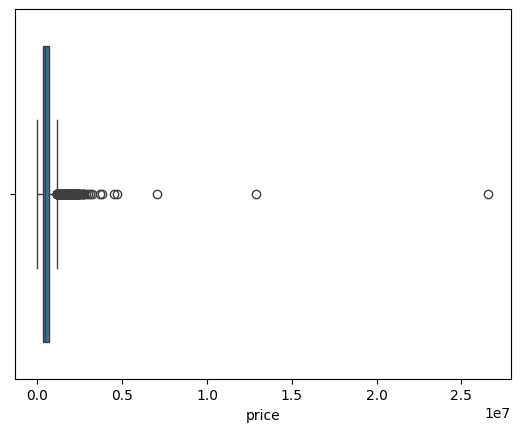

In [44]:
scn.boxplot(x='price',data=dataset)
plt.show()

In [45]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,9.546522,98079.379783
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,9.162661,53.142102
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,1.000000,98001.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2.000000,98033.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,5.000000,98072.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,15.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,44.000000,98354.000000


In [46]:
def clean_outlayer(value):
  q1=value.quantile(0.25)
  q3=value.quantile(0.75)
  Iqr=q3-q1
  min_b=q1-(1.5*Iqr)
  max_b=q3+(1.5*Iqr)
  return min_b,max_b

In [47]:
dataset.shape

(4600, 14)

In [48]:
clean_outlayer(dataset['price'])

(np.float64(-175256.25), np.float64(1153093.75))

In [49]:
# dataset= dataset[dataset['price']<=1153093.75]

In [50]:
dataset.shape

(4600, 14)

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  city           4600 non-null   int64  
 13  statezip       4600 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 503.3 KB


In [52]:
# scn.boxplot(x='bedrooms',data=dataset)
# plt.show()

In [53]:
# clean_outlayer(dataset['bathrooms'])

In [54]:
# dataset=dataset[(dataset['bathrooms']<=3.625) &(dataset['bathrooms']>=0.625)]

In [55]:
# clean_outlayer(dataset['bedrooms'])

In [56]:
# dataset=dataset[(dataset['bedrooms']<=5.5)&(dataset['bedrooms']>=1.5)]

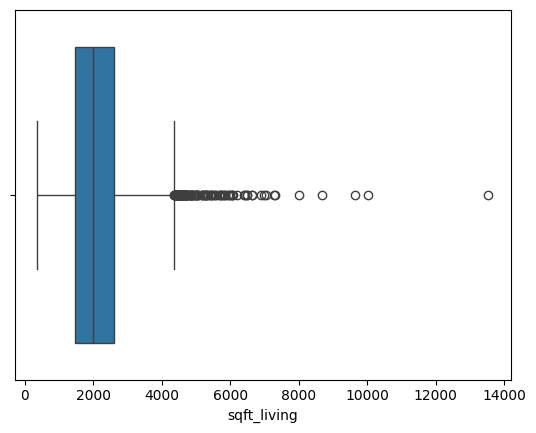

In [57]:
scn.boxplot(x='sqft_living',data=dataset)
plt.show()

In [58]:
# clean_outlayer(dataset['sqft_living'])

In [59]:
# dataset=dataset[(dataset['sqft_living']<=4015.0)]

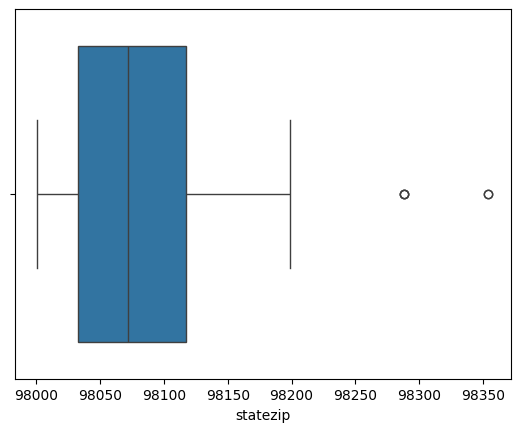

In [60]:
scn.boxplot(x='statezip',data=dataset)
plt.show()

In [61]:
# clean_outlayer(dataset['sqft_lot'])

In [62]:
# dataset=dataset[(dataset['sqft_lot']<=18460.0)]

In [63]:
# clean_outlayer(dataset['sqft_basement'])

In [64]:
# dataset=dataset[(dataset['sqft_lot']<=3340.0)]

In [65]:
# dataset=dataset[(dataset['sqft_lot']<=750.0)]